# Color Magnitude Diagram and Spectrum

Ipython notebook for color magnitude diagram and spectrum.

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the Data

In [2]:
data = pd.read_csv("SEIP-I1I2I4M1-SNR-GT5-Goodflags-Gaia-SNR-GT-3-230331")

## Printing the Column Names

In [3]:
data.columns.values

array(['objid', 'crowded', 'badbkgmatch', 'ra', 'dec', 'l', 'b',
       'nmatches', 'nreject', 'nbands', 'i1_fluxtype', 'i2_fluxtype',
       'i3_fluxtype', 'i4_fluxtype', 'm1_fluxtype', 'i1_fluxflag',
       'i2_fluxflag', 'i3_fluxflag', 'i4_fluxflag', 'm1_fluxflag',
       'i1_softsatflag', 'i2_softsatflag', 'i3_softsatflag',
       'i4_softsatflag', 'i1_f_ap2', 'i1_df_ap2', 'i2_f_ap2', 'i2_df_ap2',
       'i3_f_ap2', 'i3_df_ap2', 'i4_f_ap2', 'i4_df_ap2', 'm1_f_psf',
       'm1_df_psf', 'i1_extfrac', 'i2_extfrac', 'i3_extfrac',
       'i4_extfrac', 'm1_extfrac', 'i1_brtfrac', 'i2_brtfrac',
       'i3_brtfrac', 'i4_brtfrac', 'm1_brtfrac', 'i1_snr', 'i2_snr',
       'i3_snr', 'i4_snr', 'm1_snr', 'i1_seflags', 'i2_seflags',
       'i3_seflags', 'i4_seflags', 'm1_dflag', 'm1_sflag', 'i1_meannoise',
       'i2_meannoise', 'i3_meannoise', 'i4_meannoise', 'm1_meannoise',
       'smid', 'regid', 'irac_obstype', 'mips_obstype', 'i1_coverage',
       'i2_coverage', 'i3_coverage', 'i4_coverage'

# Adding i1, i2, i3, i4, m1 Apparent Magnitude and Absolute Magnitude Columns to the data Dataframe

In [4]:
flux_col_names = ["i1_f_ap2","i2_f_ap2", "i3_f_ap2", "i4_f_ap2","m1_f_psf"]
f0_zero_pt_flux = np.array([280.9, 179.7, 115.0, 64.13, 7.17])
app_mag_col_names = ["i1_app_mag", "i2_app_mag", "i3_app_mag", "i4_app_mag", "m1_app_mag"]
ABS_MAG_col_names = ["i1_ABS_MAG", "i2_ABS_MAG", "i3_ABS_MAG", "i4_ABS_MAG", "m1_ABS_MAG"]

for i in range(len(flux_col_names)):
    data[app_mag_col_names[i]] = -2.5*np.log10(1.0e-6*data[flux_col_names[i]]/f0_zero_pt_flux[i])
    data[ABS_MAG_col_names[i]] = data[app_mag_col_names[i]] - 5.0*np.log10(data["Dist"]) + 5.0
    

## Filtering the Data

[17464. 15978.  9239.  9199.  1414.   873.   806.]


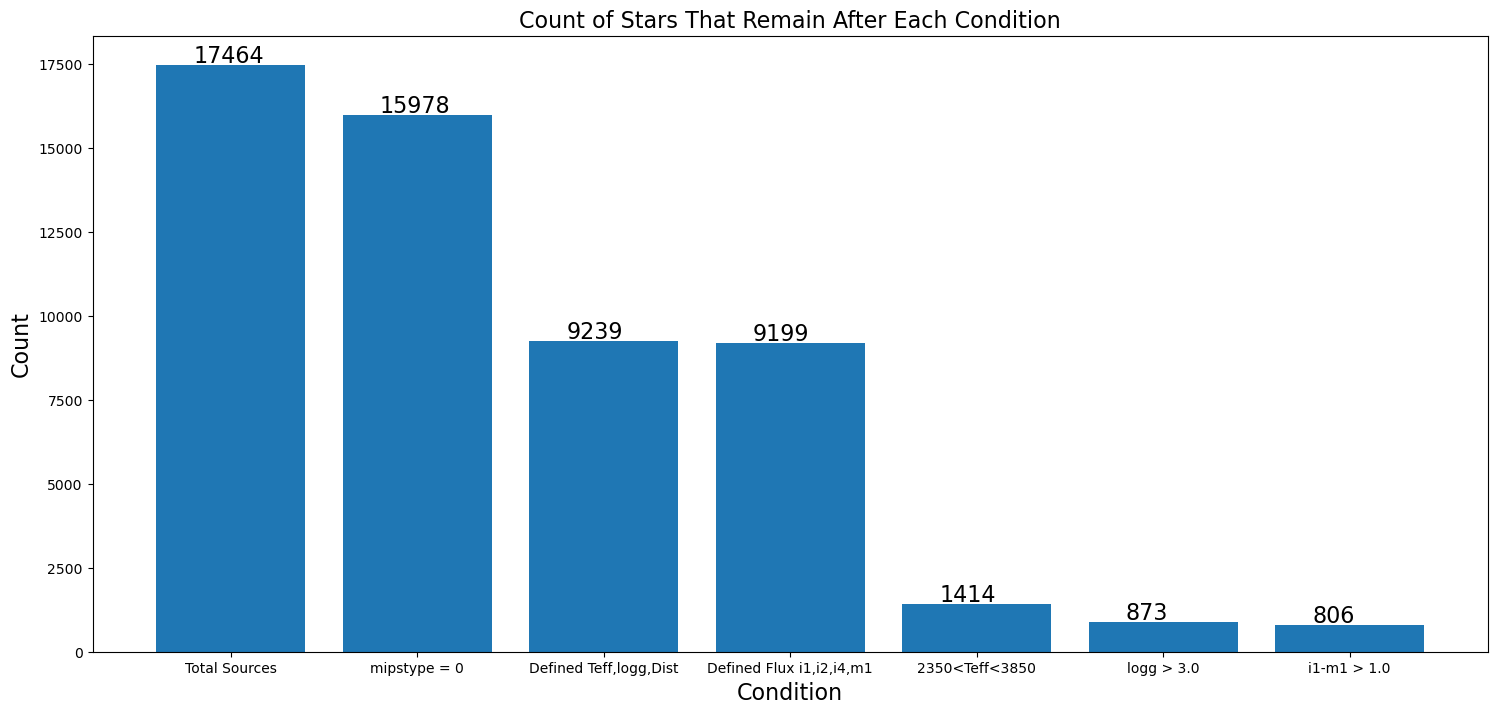

Total Sources               17464.0
mipstype = 0                15978.0
Defined Teff,logg,Dist       9239.0
Defined Flux i1,i2,i4,m1     9199.0
2350<Teff<3850               1414.0
logg > 3.0                    873.0
i1-m1 > 1.0                   806.0
Name: Count, dtype: float64


In [5]:
filter_list = ["Total Sources","mipstype = 0", "Defined Teff,logg,Dist", "Defined Flux i1,i2,i4,m1", "2350<Teff<3850", "logg > 3.0", "i1-m1 > 1.0"]
#filter_list = ["Total Sources","mipstype = 0", "Defined Teff, \n logg, \n Dist", "Defined Flux i1,i2, \n i4,m1", "2350<Teff<3850", "logg > 3.0", "i1-m1 > 1.0"]
filter_query_list = ["index == index or index != index", "mips_obstype ==0", "Teff.notnull() & logg.notnull() & Dist.notnull()", "i1_f_ap2.notnull() & i2_f_ap2.notnull() & i4_f_ap2.notnull() & m1_f_psf.notnull()", "Teff >= 2350.0 & Teff < 3850.0", "logg > 3.0", "i1_app_mag-m1_app_mag > 1.0"]

count_each_condition = np.zeros(len(filter_list))
data_subset = data

for i in range(len(filter_list)):
    data_subset = data_subset.query(filter_query_list[i])
    count_each_condition[i] = len(data_subset)

print(count_each_condition)

plt.figure(figsize=(18,8))
plt.bar(filter_list, count_each_condition)

plt.ylabel("Count", fontsize=16)
plt.xlabel("Condition", fontsize=16)
plt.title("Count of Stars That Remain After Each Condition", fontsize=16)

for index, value in enumerate(count_each_condition):
    plt.text(index-0.2, value+80, str(int(value)), fontsize=16)

plt.show()    

results_series = pd.Series(data=count_each_condition, index = filter_list, name="Count")
print(results_series)

results_series.to_csv("filter_results.csv")

In [6]:
data_subset.head(15)

,objid,crowded,badbkgmatch,ra,dec,l,b,nmatches,nreject,nbands,...,i1_app_mag,i1_ABS_MAG,i2_app_mag,i2_ABS_MAG,i3_app_mag,i3_ABS_MAG,i4_app_mag,i4_ABS_MAG,m1_app_mag,m1_ABS_MAG
112,SSTSL2 J105452.14-615209.2,0,0,163.717252,-61.869238,289.649598,-2.041396,1,0,7,...,10.905480,5.543741,10.856613,5.494874,10.826000,5.464262,10.373341,5.011602,9.149049,3.787310
414,SSTSL2 J023104.40-734232.0,0,0,37.768344,-73.708894,293.839461,-41.614047,1,0,7,...,11.870919,5.754062,11.773721,5.656865,11.722690,5.605833,11.580324,5.463468,9.470191,3.353334
714,SSTSL2 J202430.14+422233.7,0,0,306.125615,42.376034,80.132465,2.729961,1,0,7,...,11.436771,5.223677,11.242501,5.029407,10.909107,4.696014,10.234137,4.021043,7.777674,1.564581
716,SSTSL2 J053548.22-013620.5,0,0,83.950939,-1.605701,205.534991,-17.522007,1,0,7,...,12.033424,6.837193,11.993180,6.796948,11.924433,6.728202,11.758999,6.562767,9.964545,4.768314
913,SSTSL2 J222146.65+583734.5,0,0,335.444398,58.626251,104.487065,1.220537,1,0,7,...,11.812945,4.988212,11.656484,4.831751,11.492759,4.668025,11.357971,4.533238,8.150057,1.325324
957,SSTSL2 J230304.08+602500.8,0,0,345.767021,60.416900,109.938373,0.308209,1,0,7,...,11.446248,4.739760,11.364256,4.657768,11.326245,4.619757,11.245176,4.538688,9.701713,2.995225
997,SSTSL2 J161011.00-194604.2,0,0,242.545841,-19.767837,354.050667,22.808190,1,0,7,...,11.049951,5.342475,10.920849,5.213372,10.832485,5.125009,10.817995,5.110519,9.954044,4.246568
1055,SSTSL2 J013316.33+302306.0,0,0,23.318073,30.385005,133.528944,-31.624457,1,0,7,...,12.289175,6.536544,12.196754,6.444123,11.939540,6.186909,11.348551,5.595920,7.962719,2.210088
1158,SSTSL2 J160502.32-194155.3,0,0,241.259676,-19.698719,353.207342,23.741074,1,0,7,...,11.194583,5.207911,11.105089,5.118418,11.247799,5.261127,11.070296,5.083625,9.872556,3.885885
1172,SSTSL2 J052443.73+015702.6,0,0,81.182209,1.950745,200.860019,-18.241915,1,0,7,...,12.169067,5.195740,12.117043,5.143716,12.221698,5.248370,12.142472,5.169144,10.856753,3.883426


## Histogram of i1-m1 color

Text(0.5, 1.0, 'Histogram of i1_mag - m1_mag')

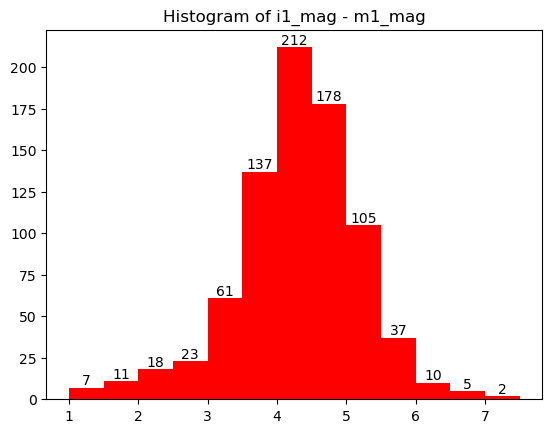

In [7]:
counts, edges, bars = plt.hist(data_subset["i1_app_mag"]-data_subset["m1_app_mag"], bins=np.arange(1.0,7.5+0.5,0.5), color="red")
plt.bar_label(bars)
plt.title("Histogram of i1_mag - m1_mag")

In [8]:
excess_candidates = data_subset[ data_subset["i1_app_mag"]-data_subset["m1_app_mag"] > 1.0 ]

In [9]:
excess_candidates.shape

(806, 227)

In [10]:
excess_candidates

,objid,crowded,badbkgmatch,ra,dec,l,b,nmatches,nreject,nbands,...,i1_app_mag,i1_ABS_MAG,i2_app_mag,i2_ABS_MAG,i3_app_mag,i3_ABS_MAG,i4_app_mag,i4_ABS_MAG,m1_app_mag,m1_ABS_MAG
112,SSTSL2 J105452.14-615209.2,0,0,163.717252,-61.869238,289.649598,-2.041396,1,0,7,...,10.905480,5.543741,10.856613,5.494874,10.826000,5.464262,10.373341,5.011602,9.149049,3.787310
414,SSTSL2 J023104.40-734232.0,0,0,37.768344,-73.708894,293.839461,-41.614047,1,0,7,...,11.870919,5.754062,11.773721,5.656865,11.722690,5.605833,11.580324,5.463468,9.470191,3.353334
714,SSTSL2 J202430.14+422233.7,0,0,306.125615,42.376034,80.132465,2.729961,1,0,7,...,11.436771,5.223677,11.242501,5.029407,10.909107,4.696014,10.234137,4.021043,7.777674,1.564581
716,SSTSL2 J053548.22-013620.5,0,0,83.950939,-1.605701,205.534991,-17.522007,1,0,7,...,12.033424,6.837193,11.993180,6.796948,11.924433,6.728202,11.758999,6.562767,9.964545,4.768314
913,SSTSL2 J222146.65+583734.5,0,0,335.444398,58.626251,104.487065,1.220537,1,0,7,...,11.812945,4.988212,11.656484,4.831751,11.492759,4.668025,11.357971,4.533238,8.150057,1.325324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17130,SSTSL2 J063703.10+042146.1,0,0,99.262932,4.362825,207.408902,-1.202148,1,0,7,...,11.516105,3.091548,10.972574,2.548016,10.640374,2.215816,9.925577,1.501020,6.886150,-1.538408
17258,SSTSL2 J181210.33-172352.3,1,0,273.043075,-17.397862,13.036273,0.484289,1,0,7,...,9.888083,2.399472,9.457041,1.968430,9.102681,1.614071,8.133856,0.645245,5.297408,-2.191202
17361,SSTSL2 J023753.69+620154.2,0,0,39.473727,62.031733,135.065247,1.694185,1,0,7,...,12.650682,2.831882,12.291724,2.472924,11.955432,2.136632,11.346793,1.527993,7.789669,-2.029131
17365,SSTSL2 J181713.16-080950.0,1,0,274.304837,-8.163891,21.748472,3.801175,1,0,7,...,12.868262,4.698951,12.839056,4.669745,12.834474,4.665164,12.181533,4.012223,10.706909,2.537599


In [11]:
excess_candidates.to_csv("excess_candidates.csv")

In [12]:
data_subset.head(20)

,objid,crowded,badbkgmatch,ra,dec,l,b,nmatches,nreject,nbands,...,i1_app_mag,i1_ABS_MAG,i2_app_mag,i2_ABS_MAG,i3_app_mag,i3_ABS_MAG,i4_app_mag,i4_ABS_MAG,m1_app_mag,m1_ABS_MAG
112,SSTSL2 J105452.14-615209.2,0,0,163.717252,-61.869238,289.649598,-2.041396,1,0,7,...,10.905480,5.543741,10.856613,5.494874,10.826000,5.464262,10.373341,5.011602,9.149049,3.787310
414,SSTSL2 J023104.40-734232.0,0,0,37.768344,-73.708894,293.839461,-41.614047,1,0,7,...,11.870919,5.754062,11.773721,5.656865,11.722690,5.605833,11.580324,5.463468,9.470191,3.353334
714,SSTSL2 J202430.14+422233.7,0,0,306.125615,42.376034,80.132465,2.729961,1,0,7,...,11.436771,5.223677,11.242501,5.029407,10.909107,4.696014,10.234137,4.021043,7.777674,1.564581
716,SSTSL2 J053548.22-013620.5,0,0,83.950939,-1.605701,205.534991,-17.522007,1,0,7,...,12.033424,6.837193,11.993180,6.796948,11.924433,6.728202,11.758999,6.562767,9.964545,4.768314
913,SSTSL2 J222146.65+583734.5,0,0,335.444398,58.626251,104.487065,1.220537,1,0,7,...,11.812945,4.988212,11.656484,4.831751,11.492759,4.668025,11.357971,4.533238,8.150057,1.325324
957,SSTSL2 J230304.08+602500.8,0,0,345.767021,60.416900,109.938373,0.308209,1,0,7,...,11.446248,4.739760,11.364256,4.657768,11.326245,4.619757,11.245176,4.538688,9.701713,2.995225
997,SSTSL2 J161011.00-194604.2,0,0,242.545841,-19.767837,354.050667,22.808190,1,0,7,...,11.049951,5.342475,10.920849,5.213372,10.832485,5.125009,10.817995,5.110519,9.954044,4.246568
1055,SSTSL2 J013316.33+302306.0,0,0,23.318073,30.385005,133.528944,-31.624457,1,0,7,...,12.289175,6.536544,12.196754,6.444123,11.939540,6.186909,11.348551,5.595920,7.962719,2.210088
1158,SSTSL2 J160502.32-194155.3,0,0,241.259676,-19.698719,353.207342,23.741074,1,0,7,...,11.194583,5.207911,11.105089,5.118418,11.247799,5.261127,11.070296,5.083625,9.872556,3.885885
1172,SSTSL2 J052443.73+015702.6,0,0,81.182209,1.950745,200.860019,-18.241915,1,0,7,...,12.169067,5.195740,12.117043,5.143716,12.221698,5.248370,12.142472,5.169144,10.856753,3.883426
